### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 2


### Дисциплина: Методы машинного обучения

##### Студент:  Мерич Дорук
##### Группа: НКНбд-01-20

## Москва 2023
***

### Вариант № 18

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик).


In [2]:
data = tfds.load("cherry_blossoms", split='train')
data = tfds.as_dataframe(data)
data1 = data[['temp_lower', 'temp_upper']].dropna()

In [3]:
X = data1['temp_lower'].values
y = data1['temp_upper']

# 2. Решите задачу полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронной сети с одним нейроном и оцените качество полученной модели по показателю, указанному в индивидуальном задании. 

In [4]:
x1 = X.reshape(-1,1)
x2 = np.hstack([x1, x1**2,x1**3]) # соединение массивов по горизонтали

reg2_model = tf.keras.Sequential([
    tf.keras.Input(shape=(3,)),
    tf.keras.layers.Dense(units=1)
])

reg2_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

history = reg2_model.fit(
    x2, y, 
    epochs=100,
    verbose=False,
    validation_split = 0.3)

mean_squared_error(y, reg2_model.predict(x2))

36/36 [==============================] - 0s 1ms/step


1.2426093

# 3. Постройте кривые обучения с зависимостью от количества эпох.

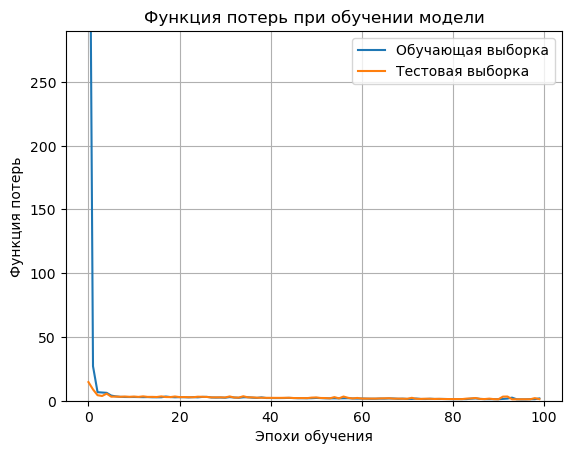

In [5]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylim([0, max(history.history['loss'])*0.5])
    plt.title('Функция потерь при обучении модели')
    plt.xlabel('Эпохи обучения')
    plt.ylabel('Функция потерь')
    plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
    plt.grid(True)
plot_loss(history)

# 4. Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линию регрессии (другим цветом), подписывая оси и рисунок. 

36/36 [==============================] - 0s 1ms/step


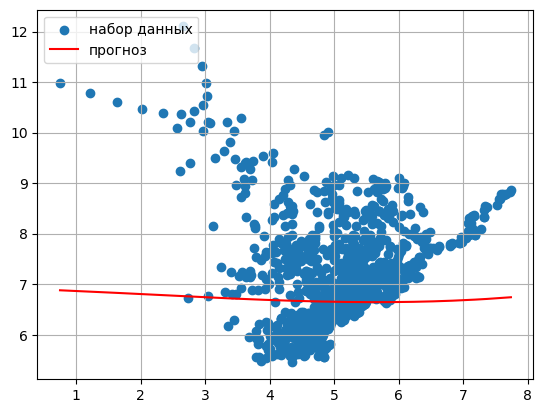

In [6]:
plt.scatter(X, y, label='набор данных')
plt.plot(np.sort(X), reg2_model.predict(x2)[np.argsort(X)], color='r', label='прогноз')
plt.legend(loc='upper left')
plt.grid();

# 5.Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании. 

In [7]:
abs(data.corr()['temp_lower'])

doy           0.271967
temp          0.663891
temp_lower    1.000000
temp_upper    0.030739
year          0.479762
Name: temp_lower, dtype: float64

In [8]:
z = data['doy']

# 6. Визуализируйте этот признак в соответствии с индивидуальным заданием. 

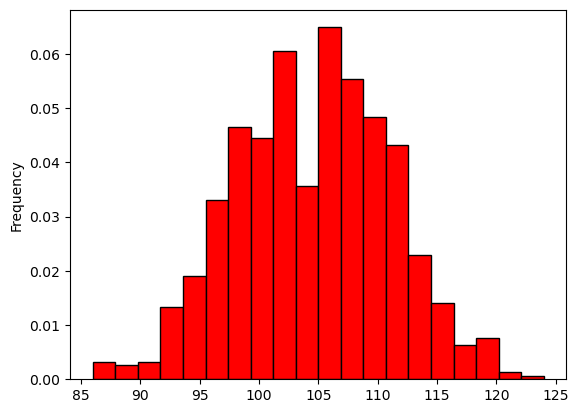

In [9]:
z.plot.hist(color='red', edgecolor='black', bins=20, density=True);

# 7. Сформируйте набор входных данных из двух признаков набора данных (независимый признак и определенный признак), создайте и адаптируйте нормализующий слой Tensorflow для двух признаков. 

In [10]:
X = data[['temp_lower', 'doy','temp_upper']].dropna()
y = X['temp_upper']
X = X[['temp_lower', 'doy']]
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(2,)) 
feature_normalizer.adapt(X)

In [11]:
X.shape

(787, 2)

# 8.	Используя созданный нормализующий слой, постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. 

In [12]:
large_model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

large_model.summary()
large_model.compile(loss='mse')
history = large_model.fit(
    X, y, 
    epochs=100,
    # уровень выводимой информации
    verbose=False,
    # проверка (валидация) на 30% обучающих данных
    validation_split = 0.3)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                3         
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 128)               384       
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33,540
Trainable params: 33,537
Non-trainable params: 3
__________________________________________________

# 9.	Визуализируйте набор данных в виде точечного графика и прогноз нейронной сети в виде поверхности в трехмерном пространстве.

82/82 [==============================] - 0s 2ms/step


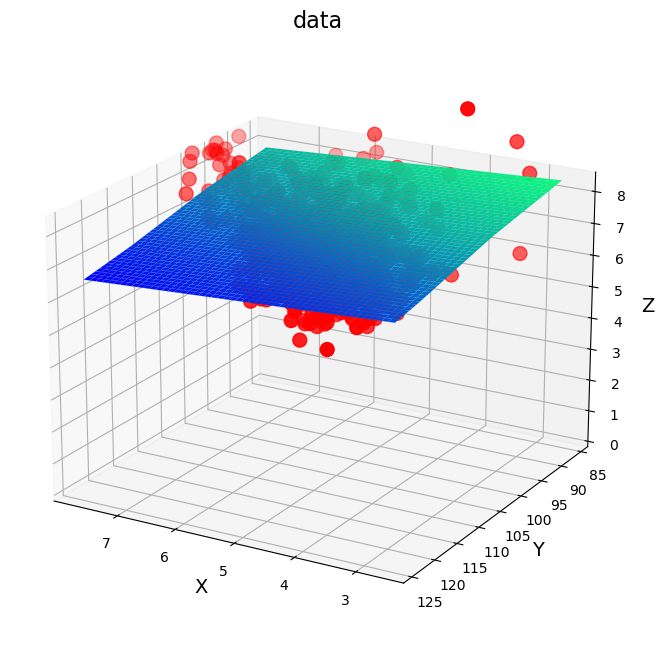

In [13]:
xs = X.values[:,0]
ys = X.values[:,1]
zs = y

n_plot = 51

x_plot = np.linspace(np.min(xs), np.max(xs), n_plot) 
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)

x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
x_mesh.shape, y_mesh.shape

x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
xy_2 = np.hstack([x_plot2, y_plot2])

z = large_model.predict(xy_2)
z_mesh = z.reshape((n_plot, n_plot))
z_mesh.shape
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, \
       rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True, \
       edgecolors='gray') 
ax.scatter( xs, ys, zs, s=100, c='r' )

ax.set_xlabel('X', fontsize=14) 
ax.set_ylabel('Y', fontsize=14)
ax.set_zlabel('Z', fontsize=14) 
ax.set_title('data', fontsize=16)

ax.set_zlim(0., z_mesh.max())
ax.view_init(elev = 20, azim = 120)

# 10.	Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

In [14]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"
    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))
    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]
    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((630, 2), (157, 2), (630,), (157,))

5/5 [==============================] - 0s 2ms/step
--> 11  done
5/5 [==============================] - 0s 2ms/step
--> 31  done
5/5 [==============================] - 0s 2ms/step
--> 51  done
5/5 [==============================] - 0s 2ms/step
--> 71  done
5/5 [==============================] - 0s 2ms/step
--> 91  done
5/5 [==============================] - 0s 2ms/step
--> 111  done
5/5 [==============================] - 0s 2ms/step
--> 131  done
5/5 [==============================] - 0s 2ms/step
--> 151  done
5/5 [==============================] - 0s 2ms/step
--> 171  done
5/5 [==============================] - 0s 3ms/step
--> 191  done
5/5 [==============================] - 0s 2ms/step
--> 211  done
5/5 [==============================] - 0s 2ms/step
--> 231  done
5/5 [==============================] - 0s 2ms/step
--> 251  done
5/5 [==============================] - 0s 2ms/step
--> 271  done
5/5 [==============================] - 0s 2ms/step
--> 291  done
5/5 [=========================

ValueError: x and y must have same first dimension, but have shapes (4,) and (31,)

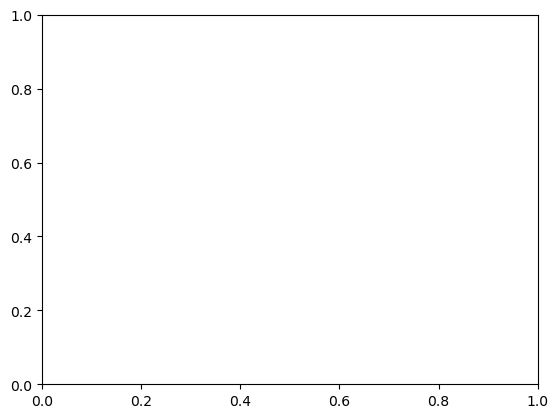

In [16]:
train_score = []
test_score = []
for i in range(11, len(X_train), 20):
    large_model.compile(loss='mse')
    large_model.fit(X_train[:i], y_train[:i], epochs=100, verbose=0)
    y_train_predict = large_model.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    y_test_predict = large_model.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))
    print('-->', i, ' done')

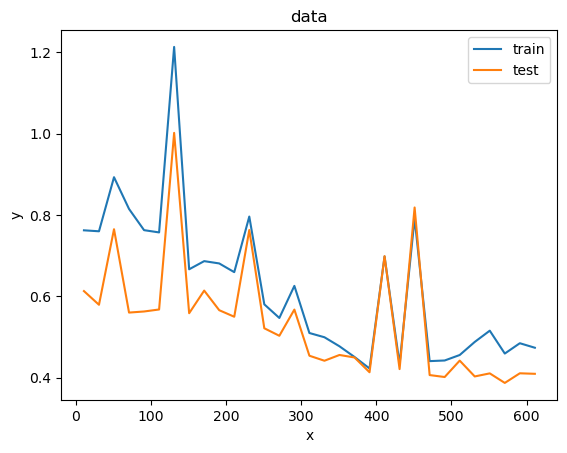

In [17]:
plt.plot([i for i in range(11, len(X_train), 20)], 
                               train_score, label="train")
plt.plot([i for i in range(11, len(X_train), 20)], 
                               test_score, label="test")
plt.title('data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();